In [129]:
import yfinance as yf
gold = yf.download('GC=F ', '2022-03-01', '2024-04-20', auto_adjust=True)

print(gold)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close  Volume
Date                                                                  
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516
...                 ...          ...          ...          ...     ...
2024-04-15  2362.100098  2384.699951  2326.000000  2365.800049    1801
2024-04-16  2384.000000  2390.800049  2371.399902  2390.800049      41
2024-04-17  2384.199951  2391.399902  2369.300049  2371.699951      37
2024-04-18  2368.399902  2384.399902  2368.399902  2382.300049     128
2024-04-19  2379.300049  2399.800049  2377.300049  2398.399902     128

[539 ro

Chuyển Date thành Timestamp

In [130]:

gold['Date'] = gold.index
gold.set_index('Date')
print(gold)

                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-04-15  2362.100098  2384.699951  2326.000000  2365.800049    1801   
2024-04-16  2384.000000  2390.800049  2371.399902  2390.800049      41   
2024-04-17  2384.199951  2391.399902  2369.300049  2371.699951      37   
2024-04-18  2368.399902  2384.399902  2368.399902  2382.300049     128   
2024-04-19  2379.300049  2399.800049  2377.300049  2398.399902     128   

                 Date  
Date         

Tạo thêm các cột MA7, MA25, MA99

In [131]:
# Tính toán và tạo cột cho trung bình động 7 ngày (MA7)
gold['MA7'] = gold['Close'].rolling(window=7).mean()

# Tính toán và tạo cột cho trung bình động 25 ngày (MA25)
gold['MA25'] = gold['Close'].rolling(window=25).mean()

# Tính toán và tạo cột cho trung bình động 99 ngày (MA99)
gold['MA99'] = gold['Close'].rolling(window=99).mean()

# In ra DataFrame để kiểm tra kết quả
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-04-15  2362.100098  2384.699951  2326.000000  2365.800049    1801   
2024-04-16  2384.000000  2390.800049  2371.399902  2390.800049      41   
2024-04-17  2384.199951  2391.399902  2369.300049  2371.699951      37   
2024-04-18  2368.399902  2384.399902  2368.399902  2382.300049     128   
2024-04-19  2379.300049  2399.800049  2377.300049  2398.399902     128   

                 Date          MA7   

In [132]:
# Thay thế các giá trị NaN bằng 0
gold.fillna(0, inplace=True)

# In ra DataFrame để kiểm tra kết quả
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-04-15  2362.100098  2384.699951  2326.000000  2365.800049    1801   
2024-04-16  2384.000000  2390.800049  2371.399902  2390.800049      41   
2024-04-17  2384.199951  2391.399902  2369.300049  2371.699951      37   
2024-04-18  2368.399902  2384.399902  2368.399902  2382.300049     128   
2024-04-19  2379.300049  2399.800049  2377.300049  2398.399902     128   

                 Date          MA7   

Chia tập train và tập test

Mô hình PROPHET

In [133]:
# !conda install libpython m2w64-toolchain -c msys2

In [134]:
# !pip install --upgrade wheel

In [135]:
# !pip install pystan

In [136]:
# !conda install -c conda-forge prophet

In [137]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
df = gold


def calculate_sar(df, acceleration=0.02, maximum=0.2):
    high = df['High']
    low = df['Low']
    close = df['Close']
    sar = pd.Series(index=df.index)
    sar[0] = low[0]
    trend = 0
    ep = 0
    af = acceleration
    for i in range(1, len(df)):
        if trend == 0:
            if high[i - 1] > high[i] and low[i - 1] > low[i]:
                trend = 1
                sar[i] = low[i]
                ep = high[i]
                af = acceleration
            elif high[i - 1] < high[i] and low[i - 1] < low[i]:
                trend = -1
                sar[i] = high[i]
                ep = low[i]
                af = acceleration
        else:
            if trend == 1:
                if high[i] > ep:
                    sar[i] = sar[i - 1] + af * (ep - sar[i - 1])
                    sar[i] = min(sar[i], low[i - 1])
                    ep = high[i]
                    af = min(af + acceleration, maximum)
                else:
                    trend = -1
                    sar[i] = ep
                    sar[i] = min(sar[i], low[i - 1])
                    sar[i] = min(sar[i], low[i])
                    ep = low[i]
                    af = acceleration
            elif trend == -1:
                if low[i] < ep:
                    sar[i] = sar[i - 1] + af * (ep - sar[i - 1])
                    sar[i] = max(sar[i], high[i - 1])
                    ep = low[i]
                    af = min(af + acceleration, maximum)
                else:
                    trend = 1
                    sar[i] = ep
                    sar[i] = max(sar[i], high[i - 1])
                    sar[i] = max(sar[i], high[i])
                    ep = high[i]
                    af = acceleration
    return sar
# Load data
# Replace 'your_data.csv' with your own data file
df = gold
print(df)
# Preprocess data (fill missing values, convert types, etc.)
# Replace any preprocessing steps here


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-04-15  2362.100098  2384.699951  2326.000000  2365.800049    1801   
2024-04-16  2384.000000  2390.800049  2371.399902  2390.800049      41   
2024-04-17  2384.199951  2391.399902  2369.300049  2371.699951      37   
2024-04-18  2368.399902  2384.399902  2368.399902  2382.300049     128   
2024-04-19  2379.300049  2399.800049  2377.300049  2398.399902     128   

                 Date          MA7   

In [138]:
df['Parabolic_SAR'] = calculate_sar(df)
df2=df.copy()
df2['y']=df2['Parabolic_SAR']
# Selecting relevant columns (Prophet requires a DataFrame with 'ds' and 'y' columns)
df2 = df2[['Date','y']].rename(columns={'Date': 'ds'})
print(df2)



                   ds            y
Date                              
2022-03-01 2022-03-01  1903.800049
2022-03-02 2022-03-02  1948.199951
2022-03-03 2022-03-03  1948.199951
2022-03-04 2022-03-04  1924.800049
2022-03-07 2022-03-07  1926.644048
...               ...          ...
2024-04-15 2024-04-15  2326.000000
2024-04-16 2024-04-16  2390.800049
2024-04-17 2024-04-17  2371.399902
2024-04-18 2024-04-18  2368.399902
2024-04-19 2024-04-19  2399.800049

[539 rows x 2 columns]


C:\Users\My My\AppData\Local\Temp\ipykernel_31736\729071449.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sar = pd.Series(index=df.index)


In [139]:
X = df2[['ds','y']]
y = df2['y']

# Tạo một điểm chia dữ liệu giả định
split_point = int(len(df2))  # 70% là tập huấn luyện

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

print(len(X_train), len(X_test))


539 0


In [140]:

# Prophet model training
prophet_model = Prophet()
prophet_model.fit(df2)



17:27:47 - cmdstanpy - INFO - Chain [1] start processing
17:27:47 - cmdstanpy - INFO - Chain [1] done processing


In [141]:
print(X_test)

Empty DataFrame
Columns: [ds, y]
Index: []


In [142]:

n_days = 30  # Số ngày muốn dự báo tiếp theo sau bộ kiểm tra
future_dates = pd.date_range(start=X_train.index[-1], periods=n_days + 1, closed='right')  # Tạo các thời điểm trong khoảng thời gian mới

future_df = pd.DataFrame({'ds': future_dates})

# Sử dụng phương thức predict để dự báo cho các thời điểm mới
forecast = prophet_model.predict(future_df)
# print(X_train)
print(forecast)

           ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2024-04-20  2208.047389  2203.470986  2274.753873  2208.047389   
1  2024-04-21  2209.515716  2203.572618  2279.586426  2209.515716   
2  2024-04-22  2210.984042  2306.074109  2379.138644  2210.984042   
3  2024-04-23  2212.452368  2306.515278  2382.937215  2212.452368   
4  2024-04-24  2213.920694  2314.827819  2383.536847  2213.920694   
5  2024-04-25  2215.389021  2313.075226  2387.696630  2215.389021   
6  2024-04-26  2216.857347  2312.715306  2387.922764  2216.857347   
7  2024-04-27  2218.325673  2215.642804  2286.906248  2218.209208   
8  2024-04-28  2219.794000  2216.123624  2285.956139  2219.417472   
9  2024-04-29  2221.262326  2311.917174  2386.887530  2220.694972   
10 2024-04-30  2222.730652  2310.394037  2384.374775  2222.020188   
11 2024-05-01  2224.198978  2314.981111  2387.789514  2223.178418   
12 2024-05-02  2225.667305  2311.001292  2387.494419  2224.223210   
13 2024-05-03  2227.135631  2306.9

C:\Users\My My\AppData\Local\Temp\ipykernel_31736\1032537560.py:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=X_train.index[-1], periods=n_days + 1, closed='right')  # Tạo các thời điểm trong khoảng thời gian mới


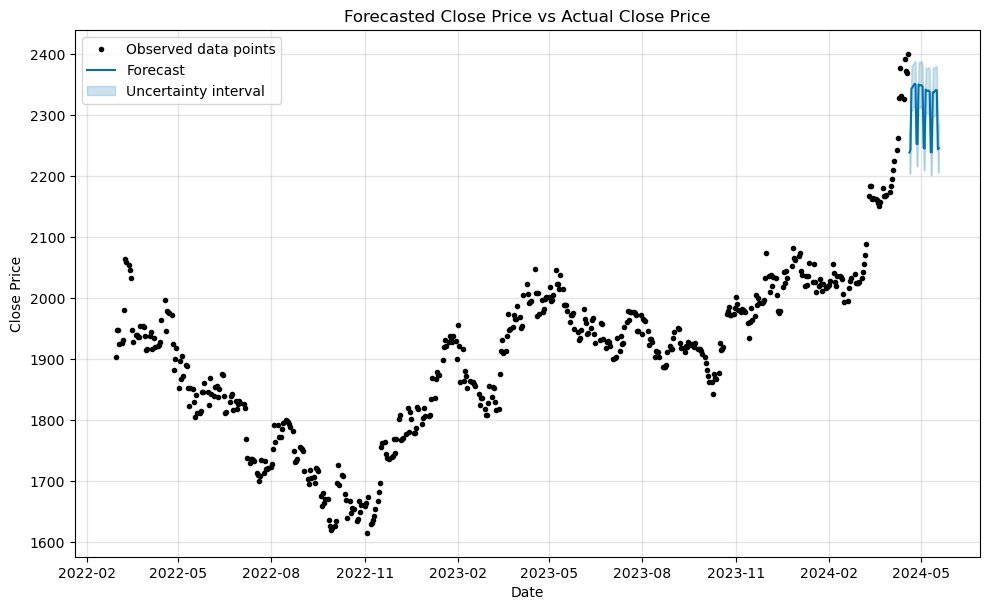

In [161]:
prophet_model.plot(forecast[len(forecast)-30:])

# Plot training data
# plt.plot(X_train.index, df['Parabolic_SAR'], label='Train', color='green')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasted Close Price vs Actual Close Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, forecast['yhat'])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, forecast['yhat'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 22.8453975285953
Mean Squared Error (MSE): 743.3386924729272
Root Mean Squared Error (RMSE): 27.264238343898903


In [ ]:
y_true = X_test['y']
y_pred = forecast['yhat']
r_squared = r2_score(y_true, y_pred)

print("R-squared:", r_squared)

R-squared: 0.7671783837917944
